In [8]:
pip install opencv-python numpy pytesseract imutils

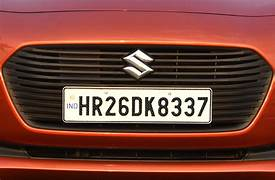

In [9]:
import cv2
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the image
image = cv2.imread('/content/no.jpeg')
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
# Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they're not needed in Colab
# cv2.waitKey(0)
# cv2.destroyAllWindows()

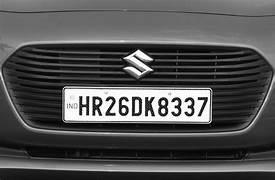

In [10]:
import cv2
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function

# Load the image
image = cv2.imread('/content/no.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using cv2_imshow
cv2_imshow(gray_image)  # Use cv2_imshow instead of cv2.imshow

# Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they're not needed in Colab
# cv2.waitKey(0)
# cv2.destroyAllWindows()

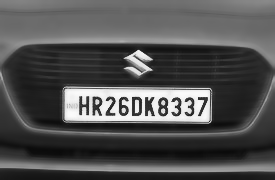

In [11]:
import cv2
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function

# Load the image
image = cv2.imread('/content/no.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter
filtered_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Display the filtered image using cv2_imshow instead of cv2.imshow
cv2_imshow(filtered_image)

# Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they're not needed in Colab
# cv2.waitKey(0)
# cv2.destroyAllWindows()

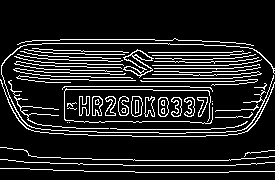

In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # Import the cv2_imshow function


blurred = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blurred, 50, 150)
cv2_imshow(edges) # Use cv2_imshow instead of cv2.imshow, cv2.waitKey and cv2.destroyAllWindows

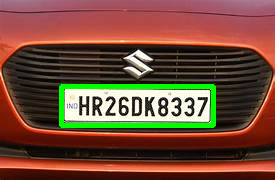

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the image
image = cv2.imread('/content/no.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filtering to reduce noise while keeping edges sharp
filtered_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Apply edge detection
edges = cv2.Canny(filtered_image, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort by area

# Draw bounding box around detected number plate
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # Assuming number plate has 4 corners
        x, y, w, h = cv2.boundingRect(cnt)
        highlighted_image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        break

# Display the highlighted number plate using cv2_imshow
cv2_imshow(highlighted_image) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # Remove this line as it's not needed in Colab
# cv2.destroyAllWindows() # Remove this line as it's not needed in Colab

Detected Number Plate Text: ~HR26DK8337



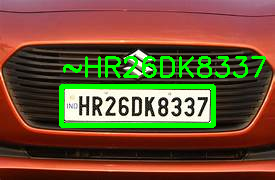

In [14]:
import cv2
import numpy as np
import pytesseract

# Load the image
image = cv2.imread('/content/no.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise while keeping edges sharp
filtered = cv2.bilateralFilter(gray, 9, 75, 75)

# Apply edge detection
edges = cv2.Canny(filtered, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Detect and highlight number plate
number_plate = None
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # Assuming number plate has 4 corners
        x, y, w, h = cv2.boundingRect(cnt)
        number_plate = image[y:y+h, x:x+w]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
        break

# Apply OCR to extract characters from number plate
if number_plate is not None:
    # Set the path to the Tesseract executable for Google Colab
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    text = pytesseract.image_to_string(number_plate, config='--psm 8')
    print("Detected Number Plate Text:", text)

    # Display extracted text on the image
    cv2.putText(image, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image using a method suitable for Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)